# 과제 : 데이터 분석

<데이터 분석 질문>

1.    기본 분석 및 데이터 전처리를 수행하고 결과를 설명하세요.


2.    상세 분석 및 프로세스 분석

         i.            현재 수리 프로세스가 어떻게 진행되고 있는지 설명하세요.

       ii.            현재 프로세스의 문제점(병목현상, 반복작업 등)을 분석하세요.

     iii.            케이스 소요 시간에 영향을 미치는 데이터 요소가 있다면, 이를 제시하고 근거를 설명하세요. 


3.    현재 프로세스를 개선할 수 있는 방안에 대해 서술하세요

In [50]:
# %%capture
!pip install pm4py==2.2.27

  Using cached pm4py-2.2.27-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pm4py
    Found existing installation: pm4py 1.3.0
    Uninstalling pm4py-1.3.0:
      Successfully uninstalled pm4py-1.3.0


In [2]:
# conda install python-graphviz

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\user\anaconda3


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2020.07=py38_0
  - defaults/win-64::anaconda-client==1.7.2=py38_0
  - defaults/win-64::anaconda-navigator==1.9.12=py38_0
  - defaults/noarch::anaconda-project==0.8.4=py_0
  - defaults/win-64::astropy==4.0.1.post1=py38he774522_1
  - defaults/win-64::bkcharts==0.2=py38_0
  - defaults/win-64::bokeh==2.1.1=py38_0
  - defaults/win-64::bottleneck==1.3.2=py38h2a96729_1
  - defaults/noarch::dask==2.20.0=py_0
  - defaults/noarch::flake8==3.8.3=py_0
  - defaults/win-64::h5py==2.10.0=py38h5e291fa_0
  - defaults/noarch::imageio==2.9.0=py_0
  - defaults/noarch::importlib_metadata==1.7.0=0
  - defaults/noarch::ipywidgets==7.5.1=py_0
  - defaults/win-64::jsonschema==3.2.0=py38_0
  - defaults/win-64::jupyter==1.0.0=py38_7
  - defaults/noarch::jupyterlab==2.1.5=py_0
  - defaults/noarch::jupyterlab_server==1.2.0=py_0
  - defaults/win-64::matplotl



  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2020.07  |           py38_0           6 KB
    anaconda-custom            |           py38_1          36 KB
    conda-4.12.0               |   py38haa95532_0        14.5 MB
    graphviz-2.38              |       hfd603c8_2        29.3 MB
    pandas-1.2.4               |   py38hf11a4ad_0         7.9 MB
    python-graphviz-0.20.1     |   py38haa95532_0          63 KB
    seaborn-0.11.2             |     pyhd3eb1b0_0         218 KB
    ------------------------------------------------------------
                                           Total:        52.0 MB

The following NEW packages will be INSTALLED:

  _anaconda_depends  pkgs/main/win-64::_anaconda_depends-2020.07-py38_0
  graphviz           pkgs/main/win-64::graphviz-2.38-hfd603c8_2
  importlib-metadata pkgs/main/win-6


  - defaults/noarch::imageio==2.9.0=py_0
  - defaults/noarch::importlib_metadata==1.7.0=0
  - defaults/noarch::ipywidgets==7.5.1=py_0
  - defaults/win-64::jsonschema==3.2.0=py38_0
  - defaults/win-64::jupyter==1.0.0=py38_7
  - defaults/noarch::jupyterlab==2.1.5=py_0
  - defaults/noarch::jupyterlab_server==1.2.0=py_0
  - defaults/win-64::matplotlib==3.2.2=0
  - defaults/win-64::mkl_fft==1.1.0=py38h45dec08_0
  - defaults/win-64::mkl_random==1.1.1=py38h47e9c7a_0
  - defaults/win-64::nbconvert==5.6.1=py38_0
  - defaults/noarch::nbformat==5.0.7=py_0
  - defaults/win-64::notebook==6.0.3=py38_0
  - defaults/win-64::numba==0.50.1=py38h47e9c7a_0
  - defaults/win-64::numexpr==2.7.1=py38h25d0782_0
  - defaults/win-64::numpy==1.18.5=py38h6530119_0
  - defaults/win-64::patsy==0.5.1=py38_0
  - defaults/win-64::pytables==3.6.1=py38ha5be198_0
  - defaults/win-64::python-language-server==0.34.1=py38_0
  - defaults/win-64::pywavelets==1.1.1=py38he774522_0
  - defaults/win-64::scikit-image==0.16.2=py38h


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.conversion.log.converter import to_data_frame
from pm4py.objects.conversion.dfg import factory as dfg_mining_factory
from pm4py.visualization.dfg import factory as dfg_vis_factory
from pm4py.algo.filtering.pandas.attributes import attributes_filter
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.algo.discovery.dfg import algorithm as dfg_algorithm
from pm4py.visualization.petrinet import visualizer as pn_visualizer
from pm4py.algo.discovery.alpha import factory as alpha_miner
from pm4py.visualization.petrinet import factory as vis_factory
from pm4py.visualization.petrinet import factory as pn_vis_factory
from pm4py.visualization.dfg import visualizer as dfg_visualizer

In [2]:
# mobile data
data_path = "repair4.csv"
data = pd.read_csv(data_path)

# 프로세스 마이닝에 필요한 컬럼들만 뽑기
# 이벤트 = [케이스아이디, 언제, 액티비티, 작업자,엑티비티 상태]
data = data[['caseID', 'DateTime','taskID']]

data.head()

,caseID,DateTime,taskID
0,1,2020-01-02 08:11:00,MakeTicket
1,1,2020-01-02 08:16:00,ArrangeSurvey
2,1,2020-01-02 08:16:00,InformClientSurvey
3,1,2020-01-11 21:56:00,Survey
4,1,2020-01-17 08:12:00,InternRepair


### 2. 상세 분석 및 프로세스 분석

In [3]:
cols =['case:concept:name','time:timestamp','concept:name']
process = data.copy()
process.columns = cols

In [4]:
process.head()

,case:concept:name,time:timestamp,concept:name
0,1,2020-01-02 08:11:00,MakeTicket
1,1,2020-01-02 08:16:00,ArrangeSurvey
2,1,2020-01-02 08:16:00,InformClientSurvey
3,1,2020-01-11 21:56:00,Survey
4,1,2020-01-17 08:12:00,InternRepair


In [5]:
# str로 변경 안 하면 unsupported operand type(s) for -: 'str' and 'str' 오류뜸
process['case:concept:name'] = process['case:concept:name'].astype(str)

In [6]:
# 기존 데이터를 로그 형태의 데이터프레임으로 변환

event_log = log_converter.apply(process, variant=log_converter.Variants.TO_DATA_FRAME)

In [7]:
dfg = dfg_algorithm.apply(event_log)

In [8]:
net, im, fm = dfg_mining_factory.apply(dfg)

<ipython-input-8-ed88549fd558>:1: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use algorithm entrypoint instead
  net, im, fm = dfg_mining_factory.apply(dfg)


<ipython-input-9-5ba817a6c831>:1: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  gviz = dfg_vis_factory.apply(dfg, log = event_log, variant='performance')
<ipython-input-9-5ba817a6c831>:2: DeprecatedWarning: view is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  dfg_vis_factory.view(gviz)


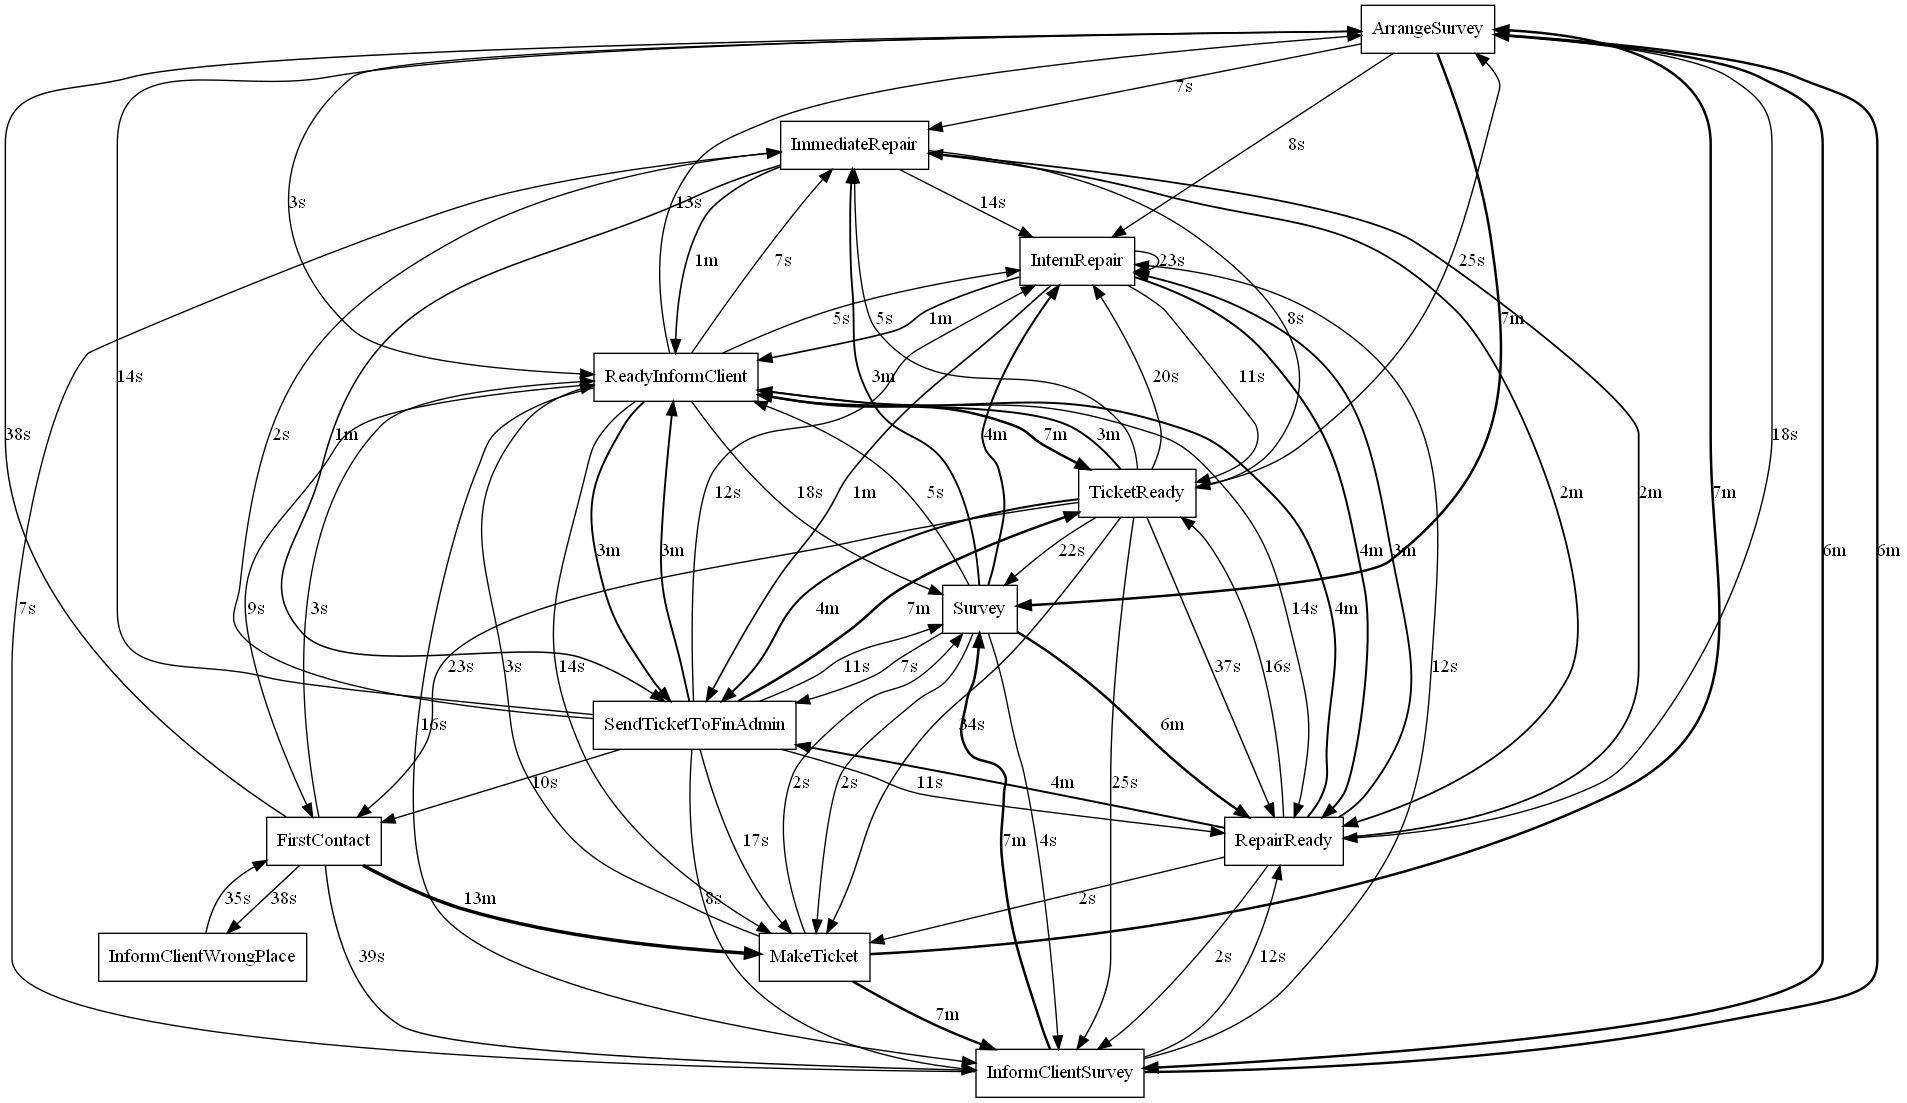

In [9]:
gviz = dfg_vis_factory.apply(dfg, log = event_log, variant='performance')
dfg_vis_factory.view(gviz)

<ipython-input-32-91f5bcf24810>:2: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  gviz = vis_factory.apply(net, im, fm)
<ipython-input-32-91f5bcf24810>:3: DeprecatedWarning: view is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  vis_factory.view(gviz)


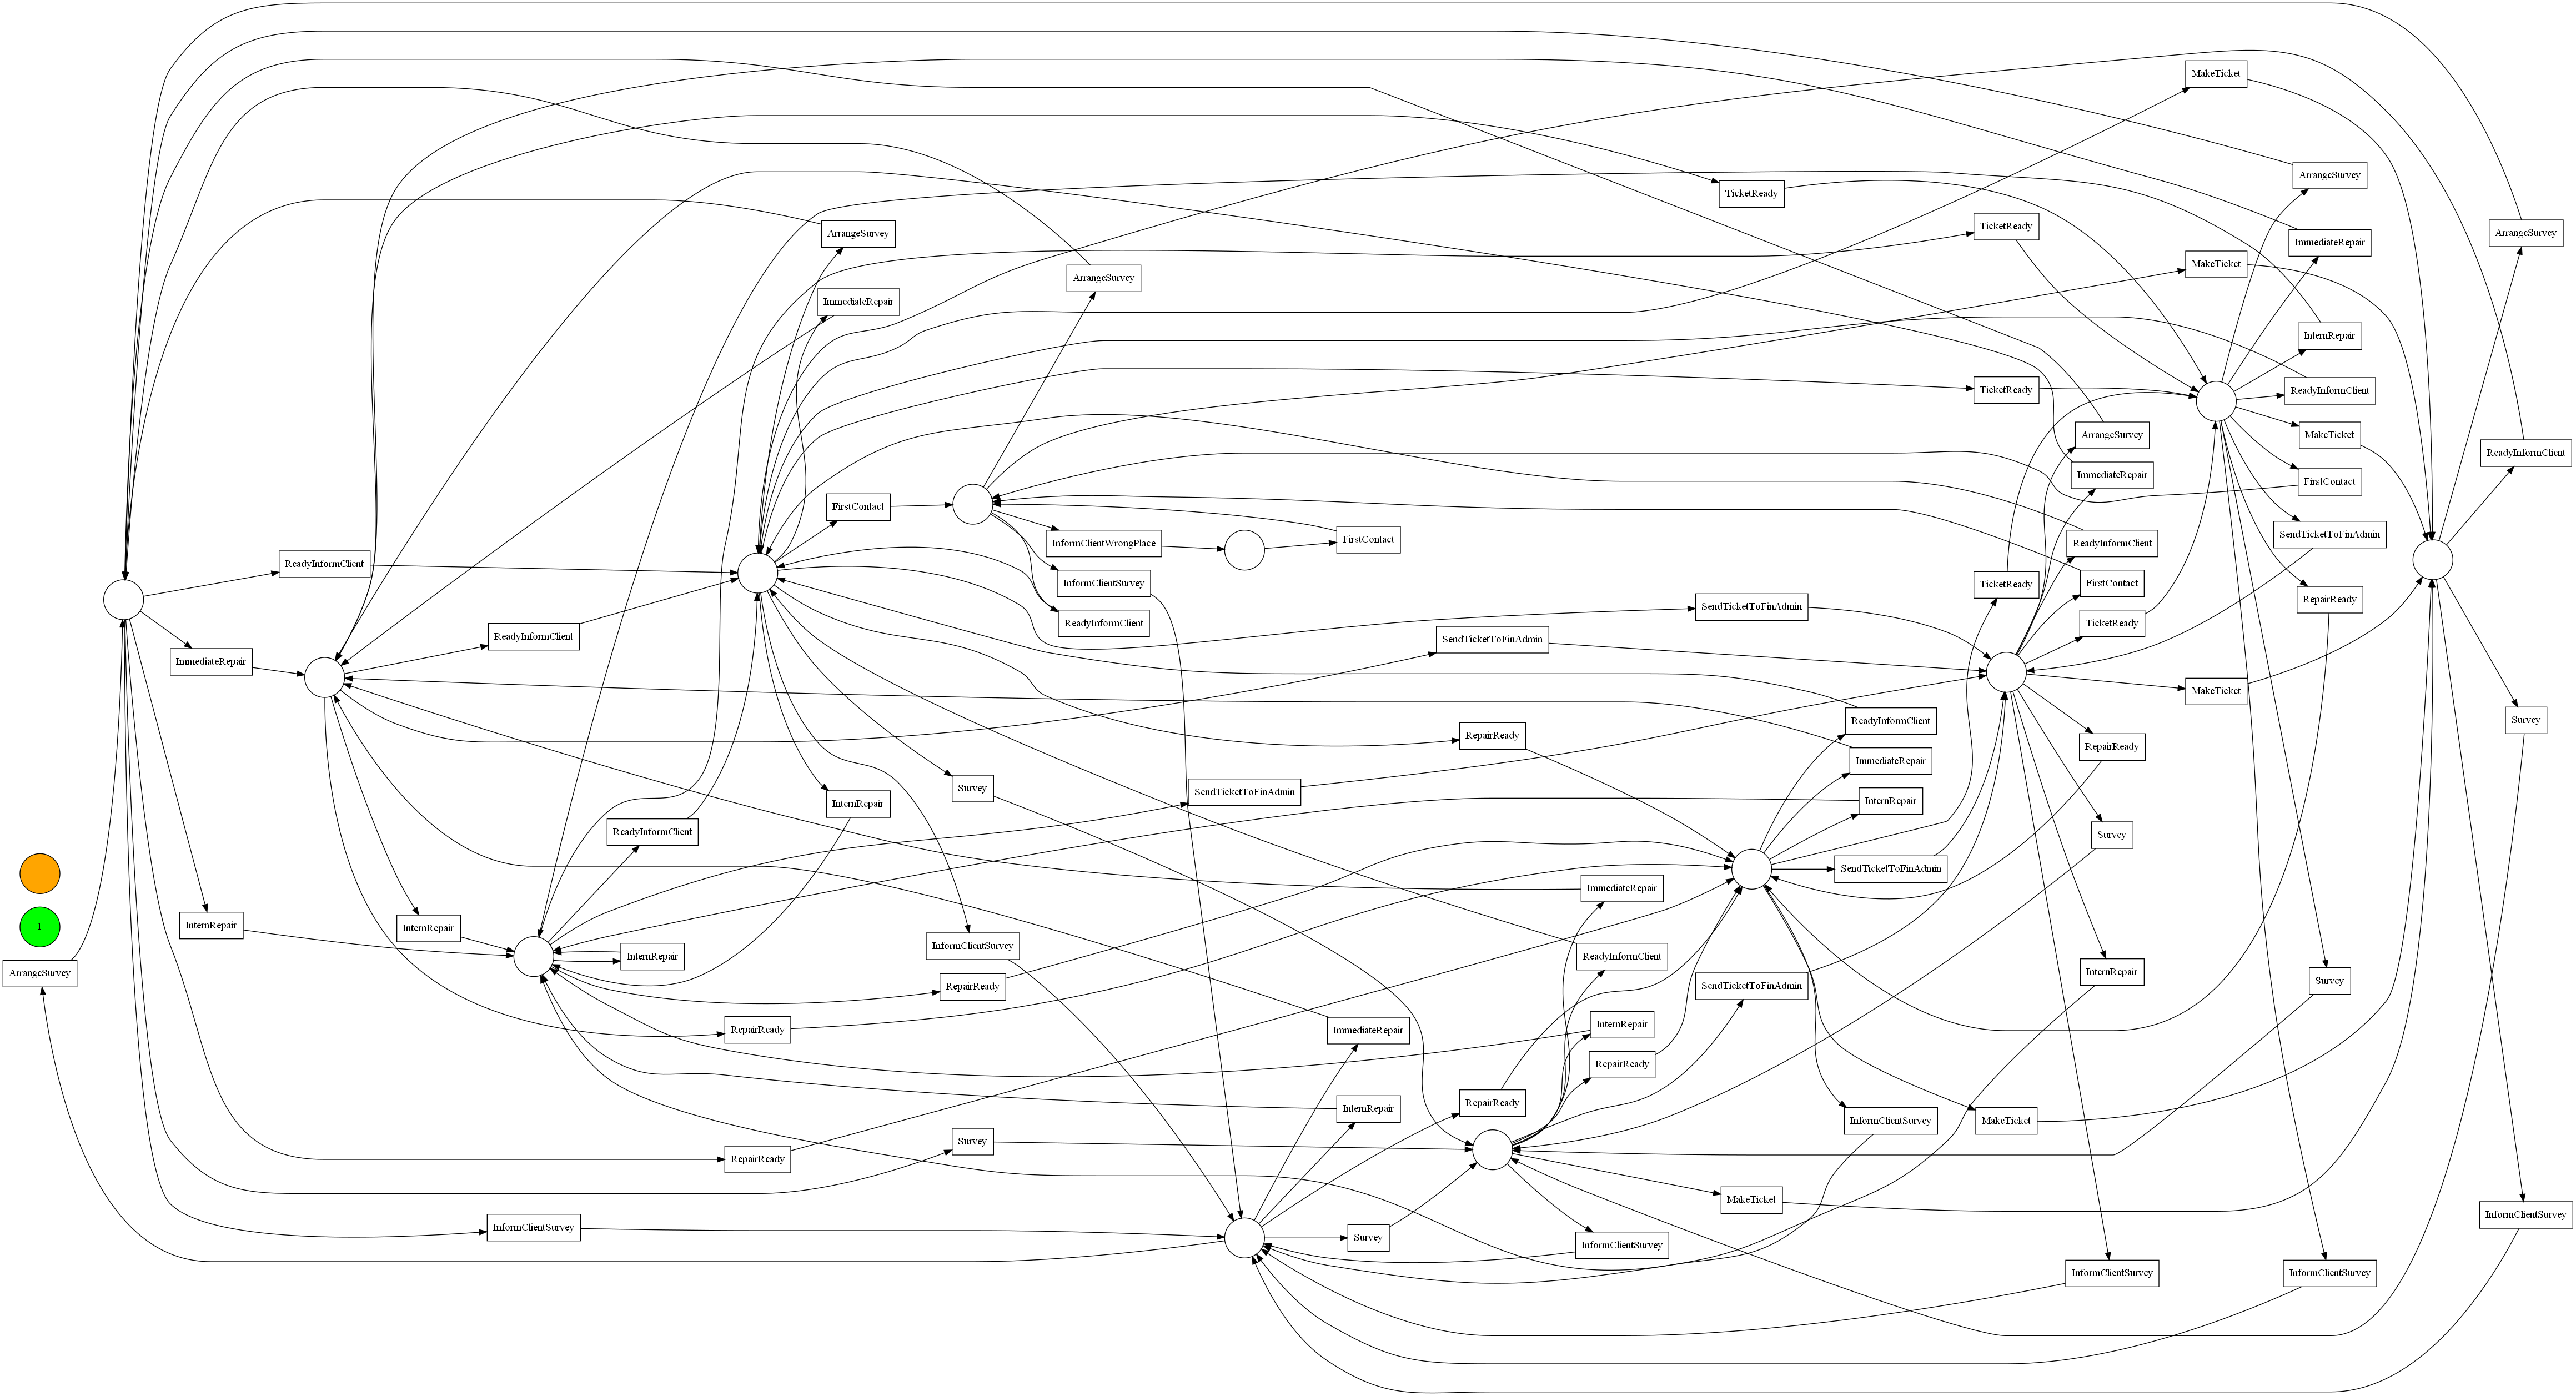

In [32]:
# petri net으로 변환
gviz = vis_factory.apply(net, im, fm)
vis_factory.view(gviz)

## 상관관계 수치로 확인하기

In [96]:
correlation = data.copy()

In [99]:
cols =['case:concept:name','time:timestamp','concept:name']
correlation = correlation.copy()
correlation.columns = cols

In [100]:
correlation['time:timestamp'] = pd.to_datetime(correlation['time:timestamp'], infer_datetime_format=True)

In [101]:
correlation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9417 entries, 0 to 9416
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   case:concept:name  9417 non-null   int64         
 1   time:timestamp     9417 non-null   datetime64[ns]
 2   concept:name       9417 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 220.8+ KB


In [102]:
correlation

,case:concept:name,time:timestamp,concept:name
0,1,2020-01-02 08:11:00,MakeTicket
1,1,2020-01-02 08:16:00,ArrangeSurvey
2,1,2020-01-02 08:16:00,InformClientSurvey
3,1,2020-01-11 21:56:00,Survey
4,1,2020-01-17 08:12:00,InternRepair
...,...,...,...
9412,1000,2020-01-19 18:34:00,RepairReady
9413,1000,2020-01-19 18:34:00,InternRepair
9414,1000,2020-01-20 02:25:00,ReadyInformClient
9415,1000,2020-01-20 02:25:00,TicketReady


In [109]:
activities_freq = dict(correlation["concept:name"].value_counts())
activities_freq

{'FirstContact': 997,
 'Survey': 929,
 'ArrangeSurvey': 928,
 'RepairReady': 927,
 'ReadyInformClient': 927,
 'MakeTicket': 927,
 'SendTicketToFinAdmin': 926,
 'InformClientSurvey': 926,
 'TicketReady': 926,
 'InternRepair': 547,
 'ImmediateRepair': 384,
 'InformClientWrongPlace': 73}